<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Katty/blob/main/Actividad_de_semana_7_Python_for_Data_Analysis_modulo_4(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre : Katherine Vanegas Salamanca

Matricula : A01794113

Materia: Ciencia de Datos

Profesor:Maria de la Paz Rico / Roberto Antonio Guevara González

Curso IBM Modulo 4 Data Analysis with Python

##Model Development

Un modelo permite a través de ecuaciones matemáticas y dadas una variables predecir una variable de salida

Entre mas relevante sea el modelo, más acertado será el modelo



##Linear and Multiple Linear Regression

Regresión Lineal

Una variable independiente ----> predicción (relacion entre las variables)

y = a + bx (donde a es el intrcepto y b la pendiente)

Las diferentes relaciones se almacenan en arreglos, los parametros ingresan al modelo para realizar una predicción

Aplicacion del modelo python

from sklearn.linar_model import LinearRegression
 se crea objeto lm

lm=LinearRegression()

Define variables

X=[['highway']]
Y=['price']

lm.fit(X, Y)  se ajusta el modelo

Obtener predicción

yhat=lm.predict(X)

lm.intercept()  intercepto
lm.coef()  pendiente



Regresión múltiple

Múltiples variables independientes ----> predicción

Relacion entre una variable dependiente continua y dos o mas variables dependientes

En python se definen las variables de entrada en un dataframe y de aplica el modelo igual que la regresion lineal


##Model Evaluation using Visualization

Evaluar el modelo mediante graficos puede ayudar a detectar rapidamente inconsistencias tanto en la data como en el modelo. 

Regression Plot:

- Estimacion de la relacion entre dos variables
- la fuerza de la correlacion
- la direccion de la relacion (positiva o negativa)

Python

import seaborn as sn

sns.regplot(x='Highpower', y='price', data=df)
ply.ylim(0,)

Grafico residual = graficar los errrores  (ojo: se debe revisar los datos antes de saber que modelo se ajusta a esos datos)

import seaborn as sn

sns.residualplot(df['Highpower'], df['price'])

Distribution Plot:

import seaborn as sn

a= sns.displot(df['price'], hist=false, color="r", label="Actual") ---->valores actuales

sns.displot(yhat, hist=false, color="r", label="Pronostico", ax=a) ----> predicción



##Polynomial Regression and Pipelines

Polynomial Regression --->cuando loa datos no son lineales

Cuadratico - 2 orden
Cubico - 3 orden

from sklearn import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=false)

x= pr.fit.transform(x[['horsepower'], ['curb']])

Normalizar los datos con StandarScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xs = scaler.transform(x[['horsepower', ['curb']]]

**PIPELINE**

varias instrucciones en uno solo codigo/ simplifica




##Measures for In-Sample Evaluation

Evaluacion numeroca de los modelos

Dosm importantes medidas para revisar el ajuste del modelo

- MSE
- R cuadrado

MSE

diferencia entre el actual y la prediccion al cuadrado

##Prediction and Decision Making

Para determinar el mejor modelo se debe revisar la combinacion de:

- valores proyectados tengan sentido
- visualizacion 
- medidas para evular los resultados (MSE R2)
- Comparar los diferentes modelos

Un MSE bajo no significa necesariamente un buen modelo
MSE de un modelo Regresion Mùltiple es mas bajo que el MSE de un modelo de regresion lineal, el error de la data disminuye a medida que se incluyen mas variables
MSE de un modelo polinomial es menor


##Graded Review Questions

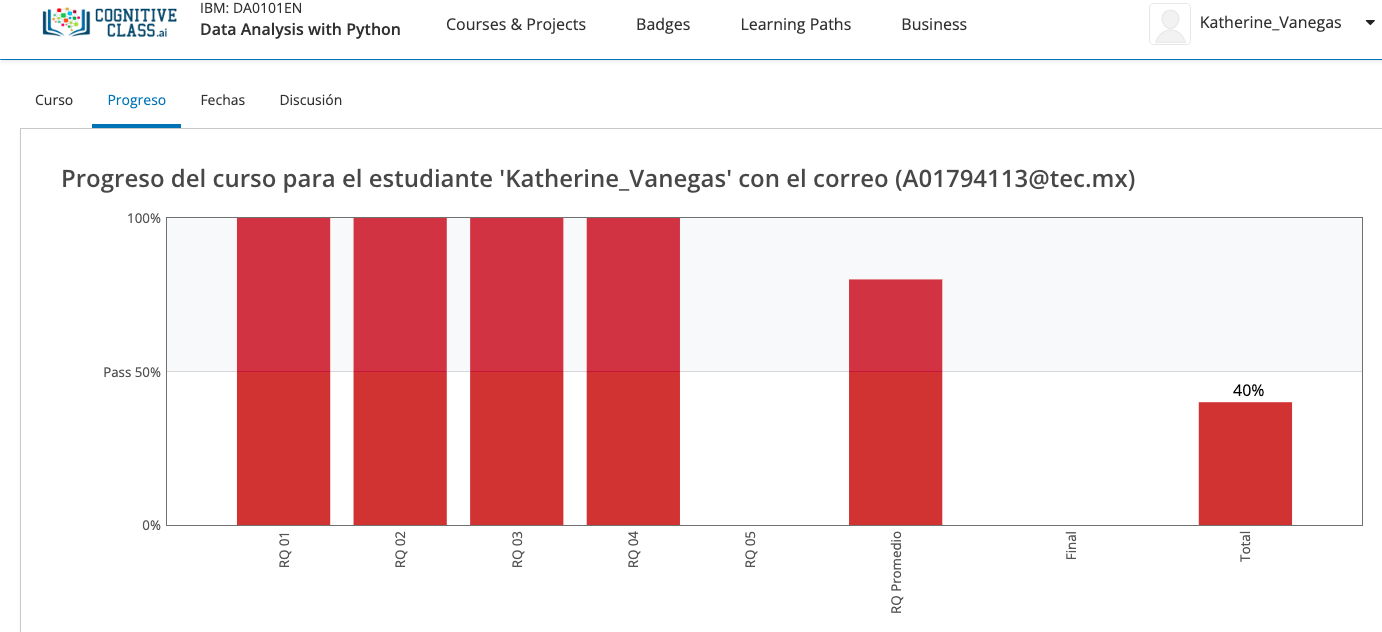

##LABS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [12]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

X=df[['highway-mpg']] #variable de entrada
Y=df['price'] #variable de salida

lm.fit(X, Y) 

yhat = lm.predict(X)
yhat[0:5]

lm.intercept_
lm.coef_

array([-821.73337832])

In [20]:
#Question #1 a): Create a linear regression object called "lm1".

lm1= LinearRegression()

#Question #1 b): Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

X=df[['engine-size']] #variable de entrada
Y=df['price'] #variable de salida

lm1.fit(X, Y) 

yhat = lm1.predict(X)
yhat[0:5]

#Question #1 c): Find the slope and intercept of the model.

lm1.intercept_
lm1.coef_

#Question #1 d): What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
price=- 7963.33 + 166.86*df['engine-size']


In [26]:
#Multiple Linear Regression

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])
lm.intercept_
lm.coef_

#Question #2 a): Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

lm2= LinearRegression()
X2 = df[['normalized-losses', 'highway-mpg']]
Y2 = df['price']

lm2.fit(X2, Y2)

#Question #2 b): Find the coefficient of the model.

lm2.coef_


array([   1.49789586, -820.45434016])

(0.0, 48185.11927741008)

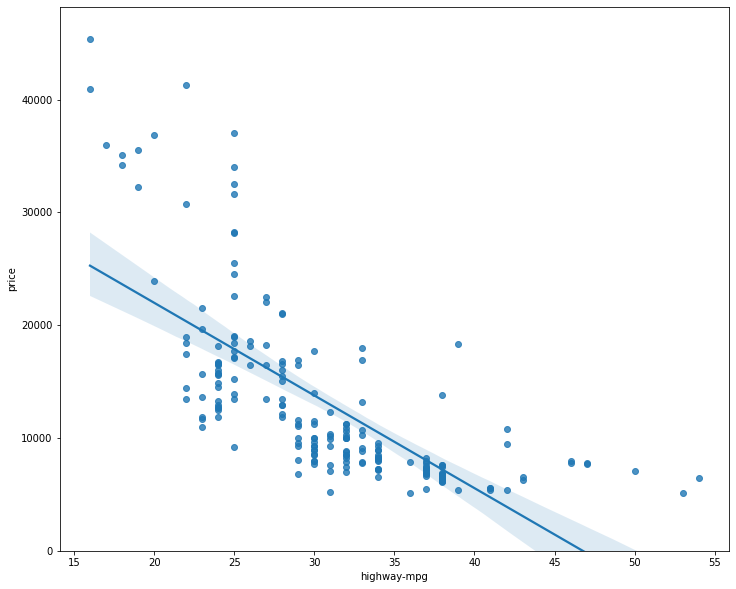

In [27]:
#Model Evaluation Using Visualization

import seaborn as sns
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

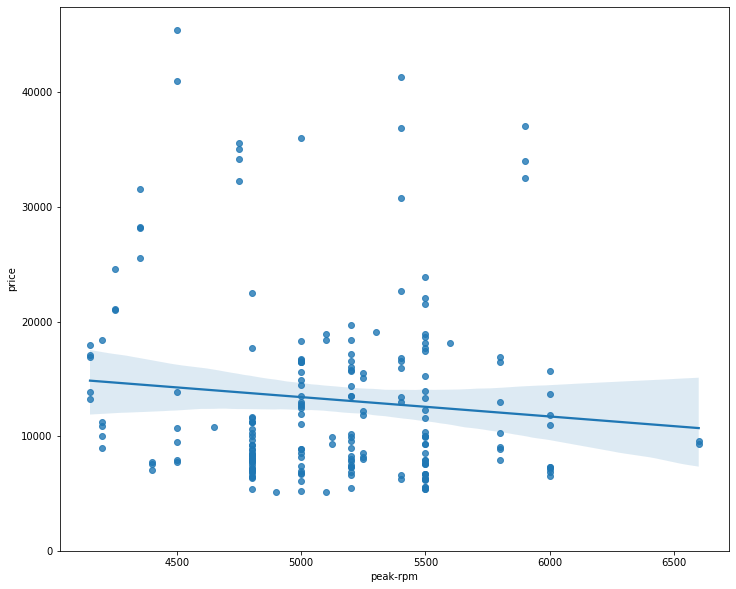

In [28]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [31]:
#Question #3: Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

df[['price', 'peak-rpm', 'highway-mpg']].corr()

# la variable highway-mpg esta mas correlacionada con la variable price

,price,peak-rpm,highway-mpg
price,1.000000,-0.101616,-0.704692
peak-rpm,-0.101616,1.000000,-0.058598
highway-mpg,-0.704692,-0.058598,1.000000


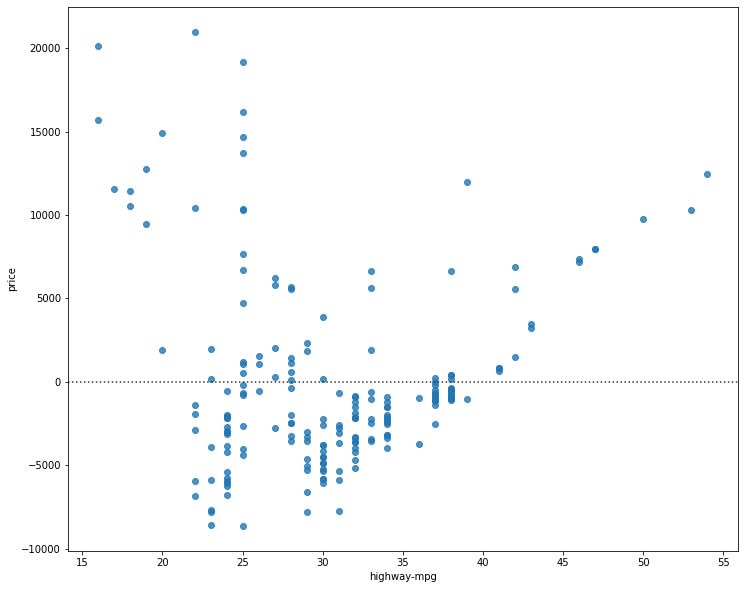

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


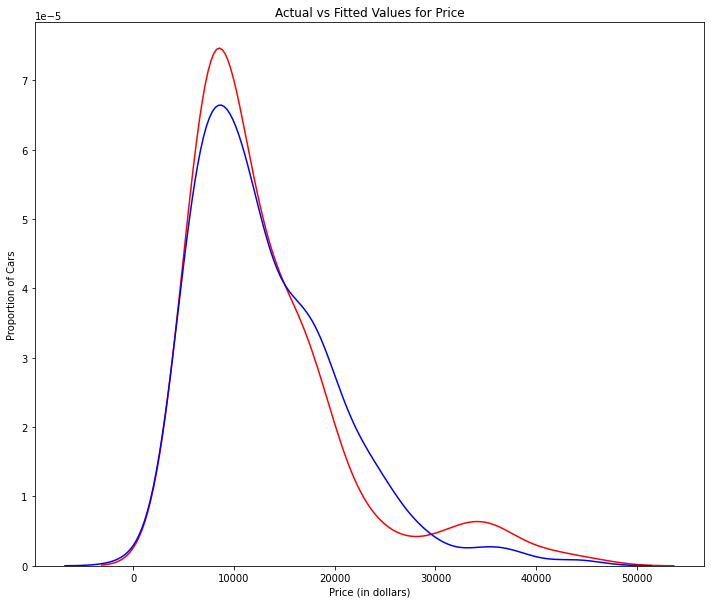

In [34]:
#Multiple Linear Regression

Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [35]:
#Polynomial Regression and Pipelines

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [37]:
x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3) #cubico
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


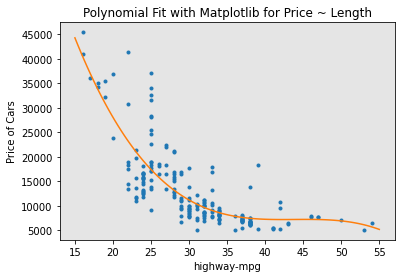

In [38]:
PlotPolly(p, x, y, 'highway-mpg')

In [39]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [42]:
#Question #4: Create 11 order polynomial model with the variables x and y from above.

f1 = np.polyfit(x, y, 11) #cubico
p1 = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


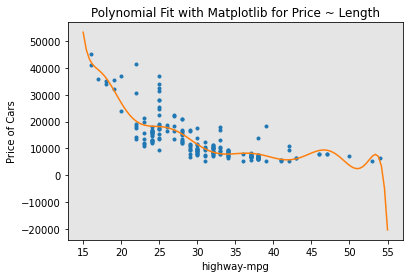

In [43]:
PlotPolly (p1, x, y, 'highway-mpg')

In [47]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

Z.shape
#Z_pr.shape

(201, 4)

In [50]:
#Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [56]:
#Question #5:¶ Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

mi_pipe=Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
mi_pipe.fit(Z, y)
yhatpipe = mi_pipe.predict(Z)
yhatpipe[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

In [57]:
#Measures for In-Sample Evaluation

#regresion lineal simple

#CALCULAR R2
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [60]:
from sklearn.metrics import mean_squared_error

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]
The mean square error of price and predicted value is:  15021126.025174143


In [61]:
#regresion lineal multiple

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price'])) #el 80% de la variacion del precio es explicado por las variables de Z

The R-square is:  0.8093562806577457


In [63]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [67]:
 #Prediction and Decision Making

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)

yhat=lm.predict(new_input)  #PREDICCION
yhat[0:5]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

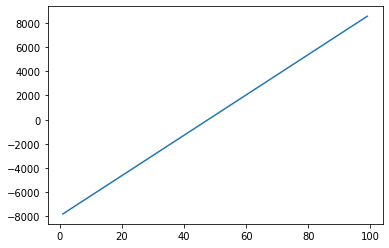

In [68]:
plt.plot(new_input, yhat)
plt.show()

Decision Making: Determining a Good Model Fit

Como determinar un buen modelo:

Cual es un buen valor para R2?
El que tenga el R2 mas alto sera el mejor modelo en esta medicion.

Cual es un buen MSE?
El modelo que tenga el MSE mas pequeño.


*Multiple Linear Regression**: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
R2: 0.49659118843391759
MSE: 3.16 x10^7

**Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.**
R2: 0.80896354913783497
MSE: 1.2 x10^7

**Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**
R2: 0.6741946663906514
MSE: 2.05 x 10^7

Siempre revisar los valores de las mediciones

